# Projet numérique

#### Pour le 10 janvier

David Castro et Antoine Rousseau

In [90]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Question 1

Soit $f : (x_1, x_2) \in \mathbb R^2 \mapsto (x_1 (\alpha - \beta x_2), - x_2 (\gamma - \delta x_1)) \in \mathbb R^2$.

Alors si $x = (x_1, x_2)$, le système différentiel s'écrit $\dot x = f(x)$. Il s'agit d'une équation différentielle autonome.

### Interprétation

- $\alpha$ correspond au taux de natalité des proies (indépendemment de la population de prédateur).
- $\beta$ correspond au taux de mortalité des proies dû aux prédateurs. Plus précisément, c'est le nombre de proies tuées par prédateur et par proie, c'est-à-dire la proportion de la population de proies que chaque prédateur est amené à tuer.
- $\gamma$ correspond au taux de mortalité des prédateurs (indépendemment de la population de proies).
- $\delta$ renvoie au taux de natalité des prédateurs qui dépend linéairement de la population de proies car elles sont leur source de nourriture.

### Points fixes

$f (x) = 0$ 

$\iff$ ($x_1 = 0$ ou $x_2 = \frac{\alpha}{\beta}$) et ($x_2 = 0$ ou $x_1 = \frac{\gamma}{\delta}$) 

$\iff (x_1, x_2) = 0$ ou $(x_1, x_2) = (\frac{\gamma}{\delta}, \frac{\alpha}{\beta})$ car les coefficients $\alpha$, $\beta$, $\gamma$ et $\delta$ sont strictement positifs.

Le système admet donc exactement deux points fixes : $0$ et $\bar x = (\frac{\gamma}{\delta}, \frac{\alpha}{\beta})$.

### Stabilité

$f$ est différentiable car polynomiale et pour tout $x = (x_1, x_2) \in \mathbb R^2$ :
$J_f (x) =
\begin{pmatrix}
\alpha - \beta x_2 & - \beta x_1 \\
\delta x_2 & \delta x_1 - \gamma
\end{pmatrix}$.

Donc $J_f (0) = \begin{pmatrix} \alpha & 0 \\ 0 & - \gamma \end{pmatrix}$.

$\alpha > 0$ et c'est une valeur prore donc $0$ est instable.

Et $J_f (\bar x) = \begin{pmatrix} 0 & - \frac{\beta \gamma}{\delta} \\
\frac{\alpha \delta}{\beta} & 0 \end{pmatrix}$.

Le polynôme caractéristique est $X^2 + \alpha \gamma$. Donc les valeurs propres de $J_f (\bar x)$ sont $\pm i \sqrt{\alpha \gamma}$ et de partie réelle nulle.

On ne peut donc rien dire de la stabilité de $\bar x$.

## Question 2

In [2]:
# On fixe les valeurs de coefficients

alpha = 2/3
beta = 4/3
gamma = 1
delta = 1

def f(x, y):
    return (x*(alpha - beta*y), y*(delta*x - gamma))

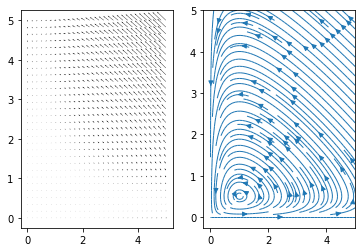

In [73]:
c = np.linspace(0, 5, 30)
d = np.linspace(0, 5, 1000)
x, y = np.meshgrid(c, c)
a, b = np.meshgrid(d, d)

u = f(a, b)
v = f(x, y)

ux, uy = u
vx, vy = v

fig, ax = plt.subplots(1, 2)
ax[0].quiver(x, y, vx, vy, angles = 'xy')
ax[1].streamplot(a, b, ux, uy, density = 1.5, linewidth = 1);

## Question 3

$f$ est continûment différentiable car elle est polynomiale et elle est aussi continue. On peut donc appliquer le théorème de Cauchy-Lipschitz. Donc pour tout $x_0 \in \mathbb R^2$, il existe une unique solution maximale $x_f$ dans $S_f (0, x_0)$.

Il suffit de montrer le résultat pour $x_f$ car si on considère $x \in S_f (0, x_0)$ différent de $x_f$ alors on peut prolonger $x$ en une solution maximale. Par unicité, ce prolongement est $x_f$ donc si le réultat est vrai pour $x_f$, il est vrai pour $x$.

Soient $x_0 = (x^1_0, x^2_0) \in (\mathbb R_+^*)^2$ et $x_f$ la solution maximale de
$S_f (0, x_0)$. On suppose qu'il existe $t$ dans le domaine de définition de $x_f$ tel que
la première composante $x_f^1 (t)$ de $x (t)$ soit inférieure ou égale à $0$. Par continuité,
il existe $\bar t \in [0, t]$ tel que $x_f^1 (\bar t) = 0$. 

Alors, $x_f \in S_f (\bar t, (0, x_f^2 (\bar t)))$. $t \mapsto (0, x_f^2 (\bar t) e^{- \gamma (t - \bar t)})$ est une solution globale donc maximale du problème de Cauchy. Par unicité, de la solution maximale, $x_0^1 = x_f^1 (0) = 0$. C'est absurde.

De même pour $x_f^2$.

## Question 4

Soit $t$ dans le domaine de définition de $x$. La fonction étant intialisée dans
$(\mathbb R_+^*)^2$, d'après la question précédente, $H (x (t))$ est bien définie.

D'après la règle de la chaîne:

$\frac{d}{dt} \left( H (x (t)) \right) = dH (x (t)) \cdot \dot x (t) = \langle \nabla H (x (t)) \vert \dot x (t) \rangle = \langle \nabla H (x (t)) \vert f (x (t)) \rangle$

$\frac{d}{dt} \left( H (x (t)) \right) =
\langle \begin{pmatrix} \delta - \frac{\gamma}{x_1} \\ \beta - \frac{\alpha}{x_2} \end{pmatrix} \vert \begin{pmatrix} x_1 (\alpha - \beta x_2) \\
x_2 (\delta x_1 - \gamma) \end{pmatrix} \rangle = 0$

Donc pour tout $t$ dans le domaine de définition de $x$, $H (x (t)) = H (x_0)$ par continuité de $t \mapsto H (x (t))$.

On conclut avec la propriété "domaine maximal d'existence" p.11 du cours. À rédiger : si une des bornes du domaine de définition était finie, au moins une des composantes de $x$ divergerait vers $+ \infty$ ou tendrait vers $0$ (en prenant en compte le fait que de toute façon, les composantes restent strictement positives). C'est impossible car cela ferait diverger $t \mapsto H (x (t))$ en cette borne ce qui contredit ce qui précède.

## Question 5

In [53]:
def H(x, y):
    return delta*x - gamma*np.log(x) + beta*y - alpha*np.log(y)

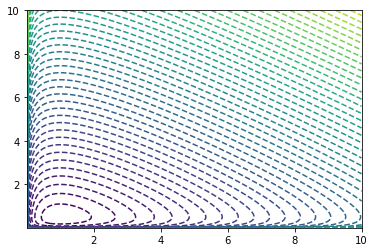

In [68]:
s = np.linspace(.0001, 10, 200)
xs, ys = np.meshgrid(s, s)
zs = H(xs, ys)

plt.contour(xs, ys, zs, levels = 50, linestyles = 'dashed');

Les courbes de niveau de H correspondent aux orbites solutions du système : on retrouve un graphique proche du deuxième de la question 2.

## Question 6

In [79]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    t = t0
    x = x0
    n = (tf - t0)//dt
    r = (tf - t0)%dt
    for j in range(n):
        x += dt*f(t, x)
        t += dt
    x += r*f(t, x)
    return x

### Test

On considère le problème de Cauchy $\ddot x + x = 0$, $x (0) = 0$ et $\dot x (0) = 1$ dont l'unique solution est la fonction $sinus$.

On peut écrire l'équation différentielle $\dot X = g (X)$,
$X (0) = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$ avec
$X = \begin{pmatrix} x \\ \dot x \end{pmatrix}$ et
$g : (x_1, x_2) \in \mathbb R^2 \mapsto (x_2, - x_1) \in \mathbb R^2$.

On modifie légèrement $solve\_euler\_explicit$ pour pouvoir représenter graphiquement la solution en gardant une bonne complexité.

In [120]:
def graphic_euler_explicit(f, x0, dt, t0, tf):
    T = np.arange(t0, tf, dt)
    X = [x0]
    for t in T:
        X.append(X[-1] + dt*f(t, X[-1]))
    return T, np.array(X[:-1], dtype = np.float)

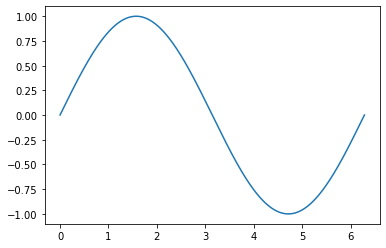

In [122]:
def g(t, x):
    return x[::-1]*np.array([1, -1])

T, X = graphic_euler_explicit(g, np.array([0, 1]), 10**(-3), 0, 2*np.pi)

plt.plot(T, X[:, 0]);

## Question 7

## Question 8

## Question 9

Soit $u : \mathbb R^2 \to \mathbb R^2$ continûment différentiable.

D'après la question 4, les solutions de l'équation de Lotka-Volterra sont solutions du nouveau système : $\dot x = f(x) - (H (x) - H_0)u(x)$.

$x \in \mathbb R^2 \mapsto f (x) - (H (x) - H_0) u (x)$ étant continûment différentiable, on peut appliquer le théorème de Cauchy-Lipschitz. Soit $x_f$ l'unique solution maximale de
$S_f (0, x_0)$ pour $x_0 \in (\mathbb R_+^*)^2$. D'après la question 4, $x_f$ est une solution globale. C'est donc également une solution maximale du second système. C'est donc l'unique solution maximale du second système.

Ainsi, si $x$ est une solution du second système, par unicité, on peut la prolonger en $x_f$ si elle n'est pas maximale et le prolongement de $x$ étant solution de l'équation de Lotka-Volterra, $x$ aussi.

Les système admettent donc exactement les mêmes solutions.

## Question 10

(Ici, $H_0$ est quelconque donc la solution considérée n'est pas a priori solution de l'équation de Lotka-Volterra)

$\frac{d}{dt} \left( H (x (t)) - H_0 \right) = \langle \nabla H (x (t)) \vert \dot x (t) \rangle = \langle \nabla H (x (t)) \vert f (x (t)) - (H (x (t)) - H_0) u (x (t)) \rangle$

$\frac{d}{dt} \left( H (x (t)) - H_0 \right) = - (H (x (t)) - H_0) \langle \nabla H (x (t)) \vert u (x (t)) \rangle$ par linéarité et d'après le calcul du 4

On pose $u : x \in \mathbb R^2 \mapsto k \nabla H (x) = k
\begin{pmatrix} \delta - \frac{\gamma}{x_1} \\ \beta - \frac{\alpha}{x_2} \end{pmatrix} \in \mathbb R^2$ qui est bien continûment différentiable car $x_1$ et $x_2$ le sont.

Alors, on a bien $\frac{d}{dt} \left( H (x (t)) - H_0 \right) = - k \Vert \nabla H (x (t)) \Vert^2 (H (x (t)) - H_0)$.

Donc on peut écrire pour $t \in \mathbb R$, $H (x(t)) = H_0 + (H (x_0) - H_0) \exp (-k \int_0^t \Vert \nabla H (x (s)) \Vert^2 ds)$.

Par croissance de l'intégrale, cette fonction est décroissante et si $x$ reste à une distance strictement positive de $\bar x$, $\Vert \nabla H (x (t)) \Vert$ est minoré par un réel strictement positif et l'intégrale diverge.

... Finir de rédiger (fin à justifier).

## Question 11